In [7]:
import pandas as pd
import sqlite3

# Exercise 03 : Bar charts

In [8]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [9]:
query = """
SELECT 
    DATE(timestamp) as date,
    CAST(strftime('%H', timestamp) AS INTEGER) as hour,
    CASE 
        WHEN strftime('%w', timestamp) IN ('0', '6') THEN 'weekend'
        ELSE 'working_day'
    END as day_type,
    count(*) as commits
FROM checker
WHERE uid LIKE 'user_%'
GROUP BY date, hour, day_type
"""

df = pd.read_sql(query, conn, index_col='date')
conn.close()

weekend_df = df[df['day_type'] == 'weekend']
working_df = df[df['day_type'] == 'working_day']
display(weekend_df.head)
display(working_df.head)

<bound method NDFrame.head of             hour day_type  commits
date                              
2020-04-18     7  weekend        1
2020-04-18    13  weekend        5
2020-04-18    14  weekend        3
2020-04-18    15  weekend       25
2020-04-18    17  weekend        7
...          ...      ...      ...
2020-05-17    18  weekend        3
2020-05-17    19  weekend        8
2020-05-17    20  weekend        2
2020-05-17    21  weekend       12
2020-05-17    22  weekend        8

[110 rows x 3 columns]>

<bound method NDFrame.head of             hour     day_type  commits
date                                  
2020-04-17     5  working_day       13
2020-04-17    11  working_day        8
2020-04-17    12  working_day        2
2020-04-20    11  working_day        2
2020-04-20    14  working_day        3
...          ...          ...      ...
2020-05-21    16  working_day        4
2020-05-21    17  working_day        1
2020-05-21    18  working_day        2
2020-05-21    19  working_day        8
2020-05-21    20  working_day       10

[178 rows x 3 columns]>

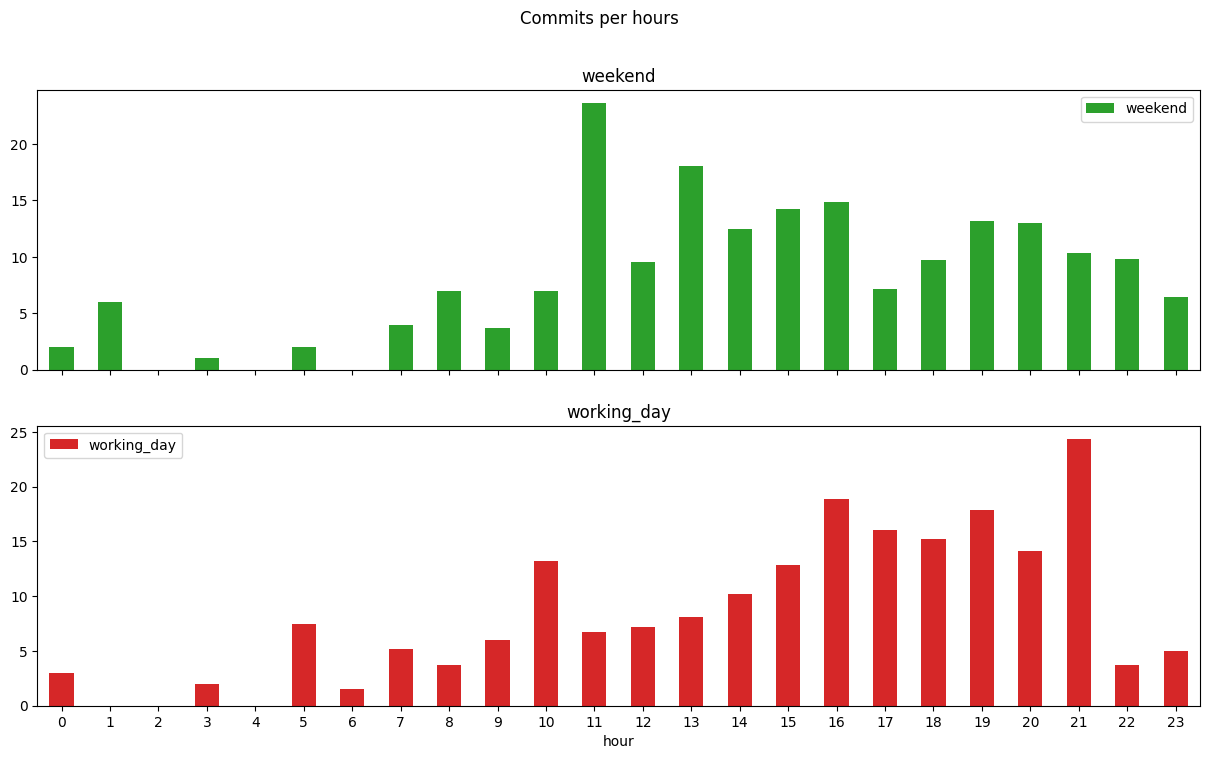

In [10]:
avg_commits = df.groupby(['hour', 'day_type'])['commits'].mean().unstack()
avg_commits = avg_commits.fillna(0)
all_hours = pd.Index(range(0, 24), name='hour')
avg_commits = avg_commits.reindex(all_hours, fill_value=0)
df.groupby(['hour', 'day_type']).mean().unstack()
fig, ax = avg_commits.plot.bar(figsize=(15, 8), title='Commits per hours', subplots=True, color={'weekend': 'tab:green', 'working_day': 'tab:red'})
ax.tick_params(axis='x', rotation=0)
ax = ax.set_xlabel('hour')

Is the dynamic different on working days and weekends?

In [11]:
max_working_hour = avg_commits['working_day'].idxmax()
max_weekend_hour = avg_commits['weekend'].idxmax()
display(max_working_hour)
display(max_weekend_hour)

21

11